In [37]:
import pandas as pd

In [38]:
file_path = 'D:\\Extra\\StackUp\\Practice\\Quests\\AI_ML_WebscrappingAndSentimentAnalysis\\Bounty\\archive\\Amazon_product_Reviews.csv'

In [39]:
# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

In [40]:
print(data.head())

                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
2 

In [41]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erpri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
# Check for missing values
print(data.isnull().sum())

id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64


In [43]:
# Text cleaning
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens

In [44]:
# Apply text cleaning function to the 'review_text' column
data['cleaned_text'] = data['reviews.text'].apply(clean_text)

In [45]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis to the 'cleaned_text' column
data['sentiment_scores'] = data['cleaned_text'].apply(lambda x: get_sentiment_scores(' '.join(x)))

# Extract compound scores for overall sentiment
data['compound_score'] = data['sentiment_scores'].apply(lambda x: x['compound'])

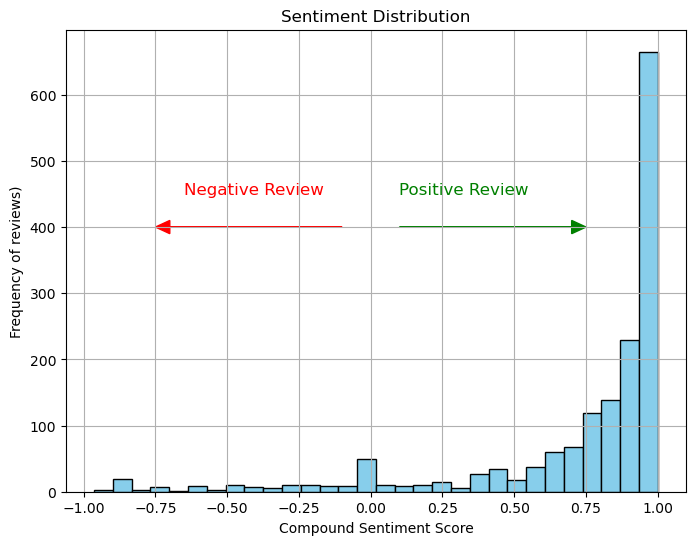

In [46]:
import matplotlib.pyplot as plt

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))

# Histogram for sentiment distribution
plt.hist(data['compound_score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency of reviews)')
plt.grid(True)

# Adding text annotations for positive and negative sentiment with arrows
plt.text(0.1, 450, 'Positive Review', fontsize=12, color='green')
plt.text(-0.65, 450, 'Negative Review', fontsize=12, color='red')

# Adding horizontal arrows to indicate positive and negative sentiment
plt.arrow(0.1, 400, 0.6, 0, head_width=20, head_length=0.05, fc='green', ec='green')
plt.arrow(-0.1, 400, -0.6, 0, head_width=20, head_length=0.05, fc='red', ec='red')


plt.show()